## Appendix D. Inferential Statistics


***

**Table of contents**   
#### &nbsp;&nbsp; I.   Data overview

#### &nbsp;&nbsp; II.   Data preparation

#### &nbsp;&nbsp; III.  Analyze IR spectra within the same group  

#### &nbsp;&nbsp; IV. Export final spectra dataset into a csv file

#### &nbsp;&nbsp; IV. Conclusions

****

### I. Data overview

<b> 1) Project scope: </b>    
IR spectroscopy is a versatile and a precise method for chemical identification because every compound exhibits unique IR spectral features; however, the spectral features tend to be ambiguous. A manual interpretation is often time-consuming and may lead to inconsistent, erroneous results. Hence, there is a need for a rapid, accurate, and reproducible alternative to a manual interpretation. 

The purpose of this program is to automate the IR spectrum interpretation routine of an unknown compound with the aid of the IR spectra database of over 40,000 known compounds available in the NIST database (http://webbook.nist.gov/chemistry/vib-ser/). The <b>goal</b> of this work is to come up with an accurate and reproducible 'guessing' algorithms. 

<b> 2) Current endeavor </b>  
In another exercise, capstone project1_data_wrangling.ipynb, I have cleaned and extracted only the organic compounds from the original list (i.e., those that contain any of the following elements: C, H, O, N, S, P, F, Cl, Br, and I. I have shortened the NIST chemical list from 72,618 to 36,416. The shortened list has been exported into a csv file called NIST_chemicals_list_organic.

In this work, the compounds in this list are grouped based on the functional groups it contain. Each group is then analyzed for its molecular weight (Mw) distribution and similarities (using Pearson correlation coefficient).

### II. Data preparation


<b> 1) Import NIST_chemicals_list_organic.csv that was prepared earlier and check </b>
Note: This list contains only the following elements: 'C','H','O','N','S','P','F','Cl','Br', and 'I'.

In [32]:
import pandas as pd

df=pd.read_csv('data/NIST_chemicals_list_organic.csv',index_col=['CAS']) #set CAS column as index 
df.head()

,Name,Formula,Elements,Mw
CAS,,,,
100-00-5,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2,"['C', 'H', 'Cl', 'N', 'O']",156.993056
100-01-6,p-Nitroaniline,C6H6N2O2,"['C', 'H', 'N', 'O']",138.042927
100-02-7,"Phenol, 4-nitro-",C6H5NO3,"['C', 'H', 'N', 'O']",139.026943
100043-29-6,2H-Tetrazole,CH2N4,"['C', 'H', 'N']",70.027946
100046-00-2,"2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide",C18H22N2O2,"['C', 'H', 'N', 'O']",298.168128


Check to make sure that this chemicals list contains only the handful list of elements(i.e., 'C','H','O','N','S','P','F','Cl','Br', and 'I'). 

In [33]:
expected_elements=['C','H','O','N','S','P','F','Cl','Br','I']
unique_elements=[] #a list to contain unique elements present in the current pandas DataFrame

el=df['Elements'].apply(lambda x: eval(x)) #converts df['Elements'] into a list 
for each in el:
    unique_elements+=each

print('The list of unique elements in the pandas DataFrame is:', list(set(list(unique_elements))))

#compare elements list
if set(unique_elements) == set(expected_elements):
    print('The above list is the same as the expected list of elements.')
else:
    print('The above list is NOT the same as the expected list of elements.')


The list of unique elements in the pandas DataFrame is: ['Br', 'N', 'F', 'P', 'C', 'S', 'I', 'Cl', 'O', 'H']
The above list is the same as the expected list of elements.


<b> 2) Randomly extract 50 samples from the list and inspect the Mw with that published on NIST website to validate </b>

In [34]:
#select 50 CAS numbers at random, without replacement
list_random=df.sample(50, replace=False).index.tolist() #convert the CAS column into a list
list_random[1:10] #check list by inspecting the first ten items

['621-34-1',
 '765-90-2',
 '6746-91-4',
 '20734-57-0',
 '4528-68-1',
 '16967-02-5',
 '36566-74-2',
 '1191-99-7',
 '77877-96-4']

In [35]:
import requests
from bs4 import BeautifulSoup
import re
from decimal import Decimal

Mw_Regex=re.compile(r'\d+\.\d+')

print('Processing... Please wait')

for cas in list_random:
    try:
        url='http://webbook.nist.gov/cgi/cbook.cgi?ID=%s' %(cas) #go to NIST website to look for the compound via its CAS number
        #print(url)
        r=requests.get(url)
        html_doc=r.content
        soup=BeautifulSoup(html_doc,"html.parser")

        #print(soup.find("main",{"id":"main"}).find("ul").find_all("li")[1].text)

        Mw=soup.find("main",{"id":"main"}).find("ul").find_all("li")[1].text
        #print(Mw)
        
        Mw_NIST=Mw_Regex.search(Mw).group()
        #print(Mw_NIST)
    except:
        pass
    
    #int(Decimal(Mw_NIST)) #turn the string into decimal, and then turn it into an integer.
    #print(int(Decimal(Mw_NIST))) #check
    
    #compare with the Mw in the table
    if int(Decimal(Mw_NIST))>=(int(df[df.index==cas]['Mw'])*1.1) or int(Decimal(Mw_NIST))<=(int(df[df.index==cas]['Mw'])*1.1):
        print('Mw_NIST=', int(Decimal(Mw_NIST)),'≈ Mw=', int(df[df.index==cas]['Mw']))
        pass
    else:
        print('Mw_NIST:', int(Decimal(Mw_NIST)), 'is not the same as Mw:', int(df[df.index==cas]['Mw']))   
    
print('Done!')


Processing... Please wait
Mw_NIST= 164 ≈ Mw= 164
Mw_NIST= 138 ≈ Mw= 138
Mw_NIST= 110 ≈ Mw= 110
Mw_NIST= 342 ≈ Mw= 341
Mw_NIST= 200 ≈ Mw= 200
Mw_NIST= 250 ≈ Mw= 250
Mw_NIST= 186 ≈ Mw= 186
Mw_NIST= 140 ≈ Mw= 140
Mw_NIST= 70 ≈ Mw= 70
Mw_NIST= 234 ≈ Mw= 234
Mw_NIST= 189 ≈ Mw= 189
Mw_NIST= 226 ≈ Mw= 226
Mw_NIST= 86 ≈ Mw= 86
Mw_NIST= 156 ≈ Mw= 155
Mw_NIST= 158 ≈ Mw= 158
Mw_NIST= 218 ≈ Mw= 218
Mw_NIST= 270 ≈ Mw= 270
Mw_NIST= 130 ≈ Mw= 130
Mw_NIST= 202 ≈ Mw= 202
Mw_NIST= 216 ≈ Mw= 216
Mw_NIST= 144 ≈ Mw= 144
Mw_NIST= 306 ≈ Mw= 303
Mw_NIST= 145 ≈ Mw= 145
Mw_NIST= 118 ≈ Mw= 118
Mw_NIST= 258 ≈ Mw= 257
Mw_NIST= 110 ≈ Mw= 110
Mw_NIST= 184 ≈ Mw= 184
Mw_NIST= 197 ≈ Mw= 195
Mw_NIST= 275 ≈ Mw= 275
Mw_NIST= 153 ≈ Mw= 153
Mw_NIST= 232 ≈ Mw= 232
Mw_NIST= 230 ≈ Mw= 230
Mw_NIST= 266 ≈ Mw= 266
Mw_NIST= 232 ≈ Mw= 232
Mw_NIST= 322 ≈ Mw= 322
Mw_NIST= 207 ≈ Mw= 207
Mw_NIST= 212 ≈ Mw= 212
Mw_NIST= 290 ≈ Mw= 290
Mw_NIST= 142 ≈ Mw= 142
Mw_NIST= 174 ≈ Mw= 174
Mw_NIST= 218 ≈ Mw= 218
Mw_NIST= 140 ≈ Mw= 140
Mw_NIST= 265

From 50 entries that are randomly selected from NIST_chemicals_list_organic.csv, no disagreement is found between the calculated molecular weight, Mw, and those listed on http://webbook.nist.gov/ website while allowing a plus/minus 10% error.

<b> 3) Extract chemicals NIST_chemicals_list_organic.csv that contain specific organic functional groups and combine into a single DataFrame called df_func_group </b>  


In [36]:
#(1) search for esters
df_ester=df[df.Name.str.endswith('oate') \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]
df_ester.head(3) #check   

,Name,Formula,Elements,Mw
CAS,,,,
10032-02-7,Geranyl caproate,C16H28O2,"['C', 'H', 'O']",252.208930
103-48-0,2-Phenylethyl 2-methylpropanoate,C12H16O2,"['C', 'H', 'O']",192.115030
10348-47-7,Ethyl 2-hydroxy-4-methylpentanoate,C8H16O3,"['C', 'H', 'O']",160.109944


In [37]:
#(2) search for ketones
df_ketone=df[df.Name.str.endswith('none') \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]

df_ketone.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1001-45-2,6-Pentadecanone,C15H30O,"['C', 'H', 'O']",226.229666
1007-32-5,1-Phenyl-2-butanone,C10H12O,"['C', 'H', 'O']",148.088815
1009-11-6,1-(4-Hydroxyphenyl)-1-butanone,C10H12O2,"['C', 'H', 'O']",164.083730


In [38]:
#(3) search for alcohols
df_alcohol=df[(df.Name.str.endswith('ol')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]

df_alcohol.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100144-29-4,Cyclopentylethynylmethyl carbinol,C9H14O,"['C', 'H', 'O']",138.104465
1002-28-4,3-Hexyn-1-ol,C6H10O,"['C', 'H', 'O']",98.073165
100-49-2,Cyclohexanemethanol,C7H14O,"['C', 'H', 'O']",114.104465


In [39]:
#(4) search for alkanes
df_alkane=df[(df.Name.str.endswith('ane')) 
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N')) \
            & ~(df['Elements'].str.contains('O'))]

df_alkane.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1002-17-1,"2,9-Dimethyldecane",C12H26,"['C', 'H']",170.203451
10052-18-3,1-Methylnorbornane,C8H14,"['C', 'H']",110.109550
101-81-5,Diphenylmethane,C13H12,"['C', 'H']",168.093900


In [40]:
#(5) search for alkenes
df_alkene=df[(df.Name.str.endswith('ene')) 
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N')) \
            & ~(df['Elements'].str.contains('O'))]

df_alkene.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1002-26-2,"1,3-heptadiene",C7H12,"['C', 'H']",96.09390
1002-27-3,"1,3,6-Heptatriene",C7H10,"['C', 'H']",94.07825
1002-33-1,"1,3-Octadiene",C8H14,"['C', 'H']",110.10955


In [41]:
#(6) search for amines
df_amine=df[(df.Name.str.endswith('amine')) 
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('O'))]

df_amine.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1003-03-8,Cyclopentanamine,C5H11N,"['C', 'H', 'N']",85.089149
100-46-9,Benzylamine,C7H9N,"['C', 'H', 'N']",107.073499
10088-37-6,"N,n'-bis-(4-(6-methyl)1,3,3a,7-tetrazaindenyl)...",C14H16N10,"['C', 'H', 'N']",324.155941


In [42]:
#(7) search for aldehydes
df_aldehyde=df[(df.Name.str.endswith('anal')) & (df.Formula.str.contains('O')) | (df.Name.str.endswith('hyde')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]

df_aldehyde.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100-50-5,3-Cyclohexene-1-carboxaldehyde,C7H10O,"['C', 'H', 'O']",110.073165
100-52-7,Benzaldehyde,C7H6O,"['C', 'H', 'O']",106.041865
103-95-7,3-(4-Isopropylphenyl)-2-methylpropionaldehyde,C13H18O,"['C', 'H', 'O']",190.135765


In [43]:
#(8) search for organic acids
df_acid=df[(df.Name.str.contains('acid')) & (df.Name.str.contains('ic')) & (df.Formula.str.contains('O')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]

df_acid.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100-09-4,"Benzoic acid, 4-methoxy-",C8H8O3,"['C', 'H', 'O']",152.047344
100-21-0,"1,4-Benzenedicarboxylic acid",C8H6O4,"['C', 'H', 'O']",166.026609
10021-92-8,"trans-Cyclohexane-1,3-dicarboxylic acid dimeth...",C10H16O4,"['C', 'H', 'O']",200.104859


In [44]:
#(9) search for ethers
df_ether=df[(df.Name.str.contains('oxy')) & (df.Name.str.contains('ether')) & (df.Formula.str.contains('O')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N'))]

df_ether.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
116373-69-4,2-(2-Cyclohexylphenoxy) ethyl-2-phenoxyethyl e...,C22H28O3,"['C', 'H', 'O']",340.203845
116435-16-6,Di-[2-(2-phenylphenoxy) ethyl] ether,C28H26O3,"['C', 'H', 'O']",410.188195
154016-61-2,Dimethoxymethyl allyl ether,C6H12O3,"['C', 'H', 'O']",132.078644


In [45]:
#(10) search for halides
"""
NEED TO CORRECT
halide_list=['F','Cl','Br','I']

df_halide=df[df.Elements.str.contains(halide_list)]
df_halide.head()
"""
df_halide=df[((df['Elements'].str.contains('F')) \
            | (df['Elements'].str.contains('Cl')) \
            | (df['Elements'].str.contains('Br')) \
            | (df['Elements'].str.contains('I'))) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('S')) \
            & ~(df['Elements'].str.contains('N')) \
            & ~(df['Elements'].str.contains('O'))]

df_halide.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1001-31-6,"Decane, 5-chloro-",C10H21Cl,"['C', 'H', 'Cl']",176.133178
1001-89-4,"Heptane, 2-chloro-",C7H15Cl,"['C', 'H', 'Cl']",134.086228
100207-07-6,"1,2-Pentadiene, 1-bromo-4,4-dimethyl-",C7H11Br,"['C', 'H', 'Br']",174.004413


In [46]:
#(11) search for thiols
df_thiol=df[((df.Name.str.contains('mercap')) | (df.Name.str.contains('thiol'))) & (df.Formula.str.contains('S')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('O')) \
            & ~(df['Elements'].str.contains('N'))]
            
df_thiol.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100-53-8,Benzenemethanethiol,C7H8S,"['C', 'H', 'S']",124.034671
105-09-9,"1,4-Benzenedimethanethiol",C8H10S2,"['C', 'H', 'S']",170.022393
106-45-6,"Benzenethiol, 4-methyl-",C7H8S,"['C', 'H', 'S']",124.034671


In [47]:
#(12) search for thiophenes
df_thiophene=df[(df.Name.str.contains('thiophene')) & (df.Formula.str.contains('S')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('O')) \
            & ~(df['Elements'].str.contains('N'))]                

df_thiophene.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100182-47-6,"4,5-Dihydrothiophene, 3-methyl-",C5H8S,"['C', 'H', 'S']",100.034671
1195-14-8,2-Methylbenzo(b)thiophene,C9H8S,"['C', 'H', 'S']",148.034671
1207-12-1,"4,6-dimethyldibenzothiophene",C14H12S,"['C', 'H', 'S']",212.065972


In [48]:
#(13) search for anilines
df_aniline=df[(df.Name.str.contains('aniline')) & (df.Formula.str.contains('N')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('O')) \
            & ~(df['Elements'].str.contains('S'))]

df_aniline.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
104-42-7,P-dodecylaniline,C18H31N,"['C', 'H', 'N']",261.245650
1126-78-9,N-Butylaniline,C10H15N,"['C', 'H', 'N']",149.120449
116296-02-7,"N,n-di-2-(3-methylpyrazyl) aniline",C16H15N5,"['C', 'H', 'N']",277.132746


In [49]:
#(14) search for benzenes
df_benzene=df[((df.Name.str.contains('phenyl')) | (df.Name.str.contains('benzene'))) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('O')) \
            & ~(df['Elements'].str.contains('N')) \
            & ~(df['Elements'].str.contains('S'))]

df_benzene.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
100-41-4,Ethylbenzene,C8H10,"['C', 'H']",106.078250
1012-76-6,"1,2-Di-tert-butylbenzene",C14H22,"['C', 'H']",190.172151
101371-20-4,1-(2-Pentyl)-4-(3-pentyl)benzene,C16H26,"['C', 'H']",218.203451


In [50]:
#(15) search for pyridines
df_pyridine=df[(df.Name.str.contains('pyridine')) & (df.Formula.str.contains('N')) \
            & ~(df['Elements'].str.contains('F')) \
            & ~(df['Elements'].str.contains('Cl')) \
            & ~(df['Elements'].str.contains('Br')) \
            & ~(df['Elements'].str.contains('I')) \
            & ~(df['Elements'].str.contains('P')) \
            & ~(df['Elements'].str.contains('O')) \
            & ~(df['Elements'].str.contains('S'))]

df_pyridine.head(3) #check

,Name,Formula,Elements,Mw
CAS,,,,
1121-55-7,3-ethenylpyridine,C7H7N,"['C', 'H', 'N']",105.057849
1122-39-0,"2,4,5-trimethylpyridine",C8H11N,"['C', 'H', 'N']",121.089149
1124-35-2,"2,4-Dimethyl-6-ethylpyridine",C9H13N,"['C', 'H', 'N']",135.104799


In [51]:
#combine the various groups into a single dictionary
dict_funct_group={}


dict_funct_group['ester']=df_ester
dict_funct_group['ketone']=df_ketone
dict_funct_group['alcohol']=df_alcohol
dict_funct_group['alkane']=df_alkane
dict_funct_group['alkene']=df_alkene

dict_funct_group['amine']=df_amine
dict_funct_group['aldehyde']=df_aldehyde
dict_funct_group['acid']=df_acid
dict_funct_group['ether']=df_ether
dict_funct_group['halide']=df_halide

dict_funct_group['thiol']=df_thiol
dict_funct_group['thiophene']=df_thiophene
dict_funct_group['aniline']=df_aniline
dict_funct_group['benzene']=df_benzene
dict_funct_group['pyridine']=df_pyridine

dict_funct_group['pyridine'].head() #check


,Name,Formula,Elements,Mw
CAS,,,,
1121-55-7,3-ethenylpyridine,C7H7N,"['C', 'H', 'N']",105.057849
1122-39-0,"2,4,5-trimethylpyridine",C8H11N,"['C', 'H', 'N']",121.089149
1124-35-2,"2,4-Dimethyl-6-ethylpyridine",C9H13N,"['C', 'H', 'N']",135.104799
1134-35-6,"2,2'-Bipyridine, 4,4'-dimethyl-",C12H12N2,"['C', 'H', 'N']",184.100048
1148-79-4,"2,2':6',2&quot;-Terpyridine",C15H11N3,"['C', 'H', 'N']",233.095297


<b> 4) Inspect each of the generated DataFrames. </b>

(a) Review the molecular weight distribution of each group

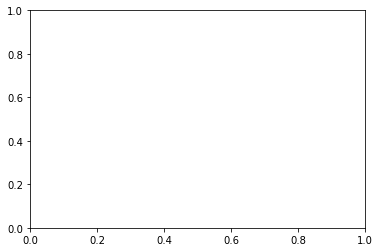

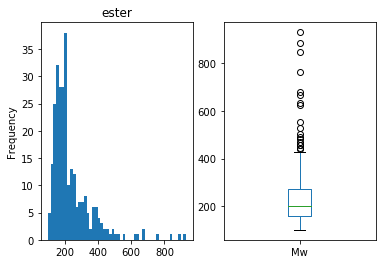

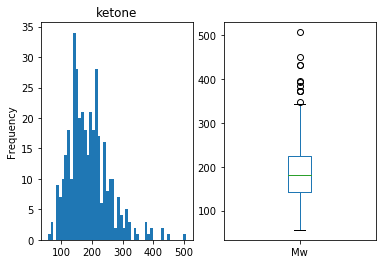

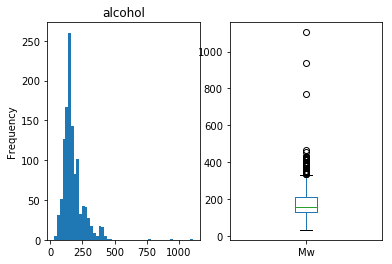

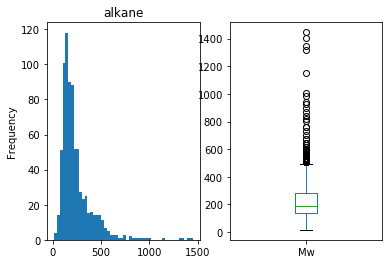

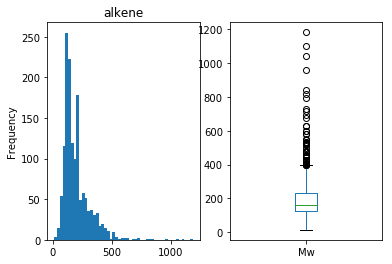

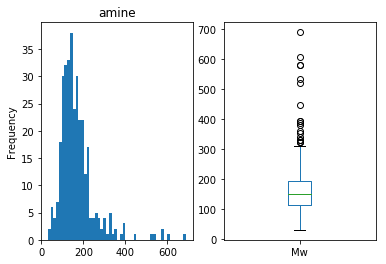

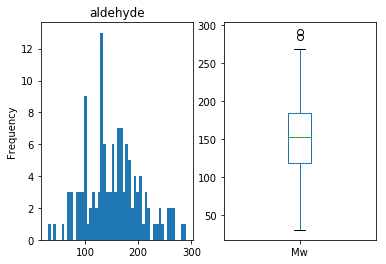

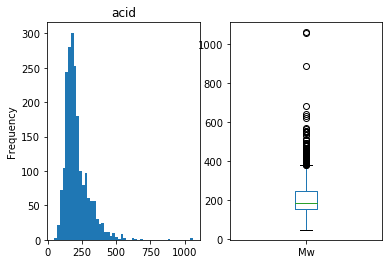

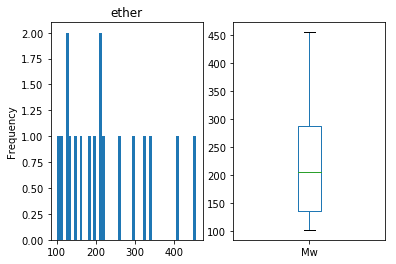

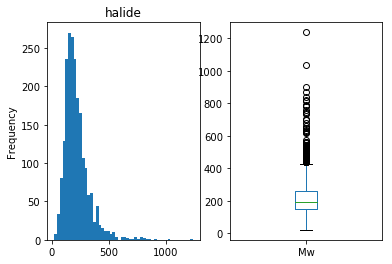

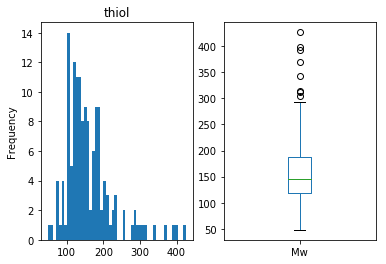

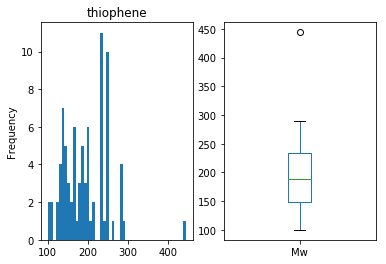

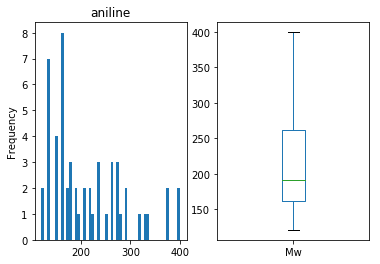

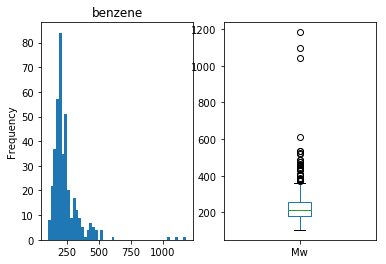

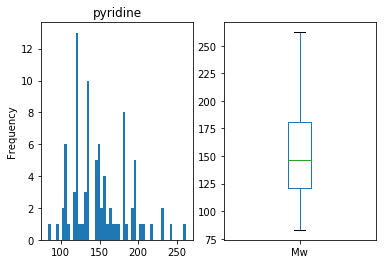

In [52]:
import matplotlib.pyplot as plt 

funct_group_list=['ester', 'ketone', 'alcohol', 'alkane', 'alkene', \
                  'amine', 'aldehyde', 'acid', 'ether', 'halide', \
                  'thiol', 'thiophene', 'aniline', 'benzene', 'pyridine']

for each in funct_group_list:
    plt.subplots()
    plt.subplot(1,2,1)
    dict_funct_group[each]['Mw'].plot(kind='hist',bins=50)
    plt.title(each)
    
    plt.subplot(1,2,2)
    dict_funct_group[each]['Mw'].plot(kind='box')
    
plt.show()

It is seen that none of the distributions have a Gaussian shape. Nevertheless, the median molecular weight tends to lie within 100-200 Daltons. In some cases, the distributions look sparse and the shapes do not resemble a bell shape. This is attributed to the few number of entries.

(b) Determine number of entries in each group

In [53]:
x_bar=[]
y_bar=[]

for each in funct_group_list:
    x_bar.append(each)
    y_bar.append(len(dict_funct_group[each]))
    print('No. of entries in %s group:' %(each), len(dict_funct_group[each]) )


No. of entries in ester group: 277
No. of entries in ketone group: 377
No. of entries in alcohol group: 1184
No. of entries in alkane group: 769
No. of entries in alkene group: 1450
No. of entries in amine group: 340
No. of entries in aldehyde group: 132
No. of entries in acid group: 2047
No. of entries in ether group: 18
No. of entries in halide group: 2098
No. of entries in thiol group: 145
No. of entries in thiophene group: 83
No. of entries in aniline group: 54
No. of entries in benzene group: 395
No. of entries in pyridine group: 88


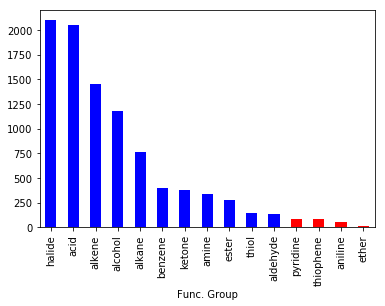

In [54]:
#display as a sorted bar chart
df_bar=pd.DataFrame()

df_bar=pd.concat([df_bar,pd.Series(x_bar)],axis=1)
df_bar=pd.concat([df_bar,pd.Series(y_bar)],axis=1)
df_bar.columns=['Func. Group','y']
df_bar=df_bar.set_index('Func. Group')
df_bar=df_bar.sort_values('y', ascending=False)

color_list=['b']*11+['r']*4
df_bar.plot.bar(color=color_list, legend=False) #remove legend
plt.show()


- All groups, except for pyridine, thiophene, aniline, and ether (red histograms) contain more than 100 entries.
- Ether group contains only 18 entries.


(c) Perform test for normality

In [55]:
#ref.: https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used
import scipy.stats as stats

for each in funct_group_list:
    print('For %s group:' %(each),stats.normaltest(dict_funct_group[each]['Mw']))
    chi_sq,pval=stats.normaltest(dict_funct_group[each]['Mw'])
    if pval>=0.05:
        print('Fail to reject the hypothesis that the distribution is normal (i.e., the distribution is normal).')
    else:
        print('REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).')
    print('\n')

For ester group: NormaltestResult(statistic=167.74213861498615, pvalue=3.7606023095633543e-37)
REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).


For ketone group: NormaltestResult(statistic=76.415835619745977, pvalue=2.5498353055501153e-17)
REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).


For alcohol group: NormaltestResult(statistic=854.14357200688528, pvalue=3.3502711854790137e-186)
REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).


For alkane group: NormaltestResult(statistic=505.55310762615568, pvalue=1.6616422428743614e-110)
REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).


For alkene group: NormaltestResult(statistic=841.83014283353896, pvalue=1.5809099534106946e-183)
REJECT the null hypothesis that the distribution is normal (i.e., the distribution is not-normal).


For amine gr

C:\Anaconda2\envs\py35\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


- It is seen that the hypothesis test for normal distribution concludes aldehyde and ether to be normally distributed. The histogram of aldehyde does suggest that the distribution is normal. 

- However, this is not the case for ether. This is attributed to the low number of n (i.e., n<=20).  

<b> 5) ANALYSIS OF DOWNLOADED SPECTRA: Import 50 spectra from NIST database per functional group </b>

(a) check number of files in reference folder

In [56]:
import glob

print('There are:', str(len(glob.glob('reference/*.jcamp'))), ' reference files within the reference folder.')

There are: 613  reference files within the reference folder.


(b) Check the number of spectra per functional group

In [57]:
#determine how many spectra you have for each group
dict_no_spectra_by_group={}

for group in funct_group_list:
    count=0
    for file in glob.glob('reference/*.jcamp'):
        #df_ether_temp=pd.DataFrame() #refresh DataFrame for each file
            if group in file:
                count+=1
    dict_no_spectra_by_group[group]=count
    #print(group,':',count)
print(dict_no_spectra_by_group)

{'ester': 50, 'thiophene': 5, 'ketone': 50, 'pyridine': 22, 'thiol': 41, 'aniline': 38, 'alkene': 50, 'alkane': 50, 'amine': 50, 'halide': 50, 'alcohol': 50, 'acid': 50, 'ether': 7, 'aldehyde': 50, 'benzene': 50}


- It is seen that not all functional groups yield 50 spectra. 

(c) List the groups that contain exactly that 50 spectra

In [58]:
for key,value in dict_no_spectra_by_group.items():
    if value == 50:
        print(key,': ',value)

ester :  50
ketone :  50
alkene :  50
alkane :  50
amine :  50
halide :  50
alcohol :  50
acid :  50
aldehyde :  50
benzene :  50


Therefore, we will only consider the above ten functional groups that have sufficient amount of data.

<b> 6)  Spectral treatment </b>   
- Read jcamp file.  
- Treat spectra (baseline subtraction, normalization, and interpolation).  


In [59]:
#new list
filtered_funct_group_list=['ester', 'ketone', 'alcohol', 'alkane', 'alkene', \
                           'amine', 'aldehyde', 'acid', 'halide', 'benzene']

(a) read jcamp files and store into a dictionary

In [60]:
"""
-read jcamp files in reference folder
-store into a dictionary-list of dataframes
-select only ones with yunits=ABSORBANCE
"""

import my_jcamp

dict_list_jcamp_funct_group={} #a dictionary-list of dataframes

#instead of storing into a dictionary, I should instead store it into a single DataFrame per functional group

for group in filtered_funct_group_list:
    dict_list_jcamp_funct_group[group]=[] #initialize an empty dictionary_array 
    for file in glob.glob('reference/*.jcamp'): #read all files with extension .jcamp
        if group in file:
            #check_xunits=my_jcamp.JCAMP_reader(file)['xunits']
            check_yunits=my_jcamp.JCAMP_reader(file)['yunits']
            if check_yunits == 'ABSORBANCE': #add to dictionary_list only if yunit is ABSORBANCE
                dict_list_jcamp_funct_group[group].append(my_jcamp.JCAMP_reader(file)) #append Jcamp dictionary to dictionary_list

In [61]:
#check the number of spectra per functional group
for group in filtered_funct_group_list:
    print(group, ': ', len(dict_list_jcamp_funct_group[group]))

ester :  34
ketone :  39
alcohol :  38
alkane :  50
alkene :  44
amine :  39
aldehyde :  37
acid :  41
halide :  42
benzene :  42


- Considering only the spectra with yunits of absorbance, the number is now reduced. Nonetheless, the numbers are still greater than 30.

(b) Treat spectra

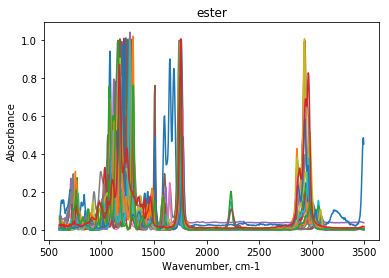

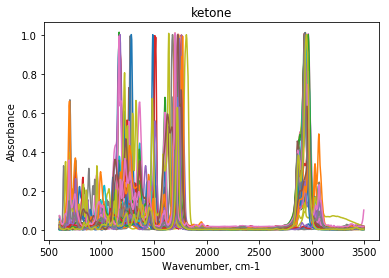

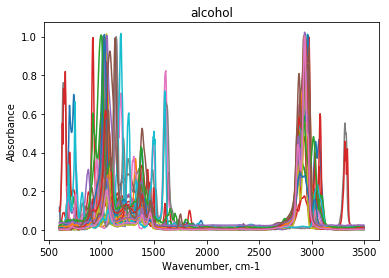

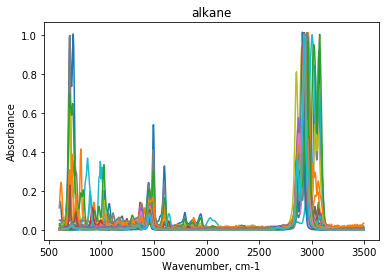

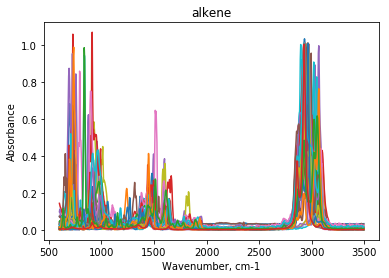

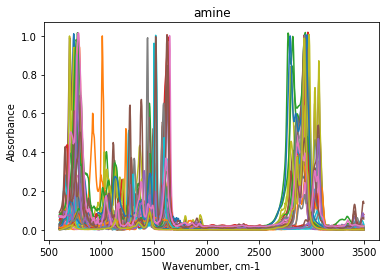

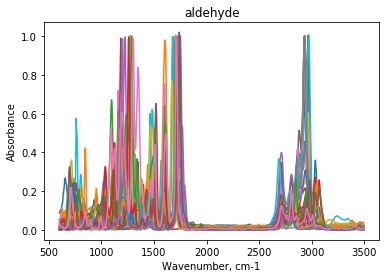

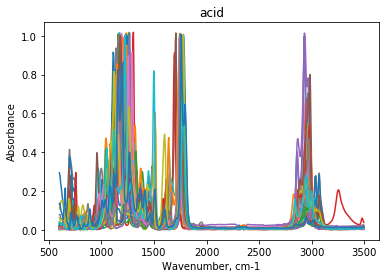

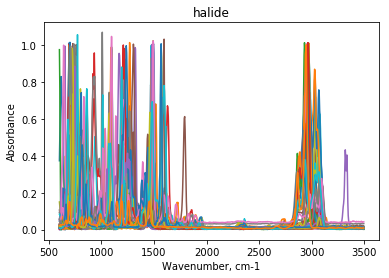

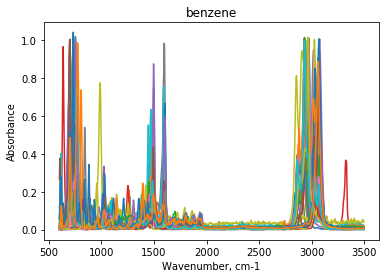

In [62]:
"""
1. Do baseline subtraction
2. uniformize intervals by interpolation
3. normalize last
4. plot all ester compounds and inspect
5. use CAS number as column names
"""

import common
import numpy as np
import matplotlib.pyplot as plt

#create DataFrames for each functional group and store within a dictionary
dict_df_funct_group={} #a dictionary of DataFrames


plt.clf()
plt.close()

for group in filtered_funct_group_list:
    df_temp=pd.DataFrame() #a temporary DataFrame: re-initialize for each new group

    
    plt.subplots() #start a new plot for each functional group
    for i in range(len(dict_list_jcamp_funct_group[group])):
        try:
            
            jcamp_r=common.standardize_units(dict_list_jcamp_funct_group[group][i]) #standardize units 
            jcamp_r=common.baseline_subtract(jcamp_r) #perform baseline subtraction
            jcamp_r=common.normalize_peaks(jcamp_r)#normalize peaks
            jcamp_r=common.interpolate_spectrum(jcamp_r,600,3500,4) #interpolate
    
            #jcamp_r=interpolate_spectrum(jcamp_r,jcamp_r['firstx'],jcamp_r['lastx'],0.5) #interpolate
            
            #Interpolation function needs to be corrected
            #create DataFrames for each functional group and store within a dictionary. For the names, use the unique CAS number.
            #df_temp=pd.concat([df_temp,pd.Series(dict_list_jcamp_funct_group[group][i]['y'])],names=[i,i+1],axis=1)
            df_temp[dict_list_jcamp_funct_group[group][i]['cas registry no']]=pd.Series(dict_list_jcamp_funct_group[group][i]['y']) #append columns with CAS number as column name
            
            
            #plot spectra
            plt.plot(jcamp_r['x'],jcamp_r['y'])
            plt.xlabel('Wavenumber, cm-1')
            plt.ylabel('Absorbance')
            plt.title(group)
        except:
            #print('Error at:', group, dict_list_jcamp_funct_group[group][i]['title'],dict_list_jcamp_funct_group[group][i]['yunits'], i)
            pass
        
    #print(df_temp.shape)
    #df_temp.columns = np.arange(0,len(df_temp.columns)) #give names
    
    #add an index column, which is the wavenumber
    df_temp['Wavenumber']=jcamp_r['x']
    df_temp=df_temp.set_index('Wavenumber') #set Wavenumber column as the index
    
    #add dataframe to dictionary   
    dict_df_funct_group[group]=df_temp           

plt.show()


- In all cases, the peaks populate the regions below 2000 and above 2800 cm-1.
- Baseline generally look flat. 
- All spectra are normalized to have values between 0 and 1.

### III.  Analyze IR spectra within the same group  

Calculate Pearson's correlation for each group and generate a heatmap

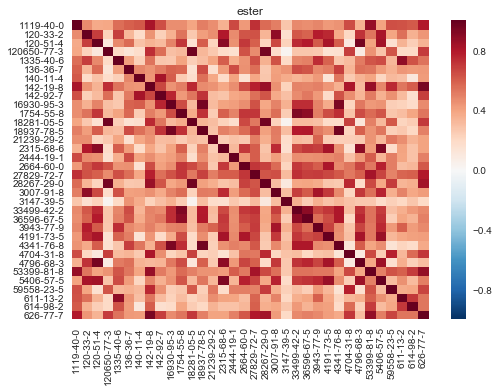

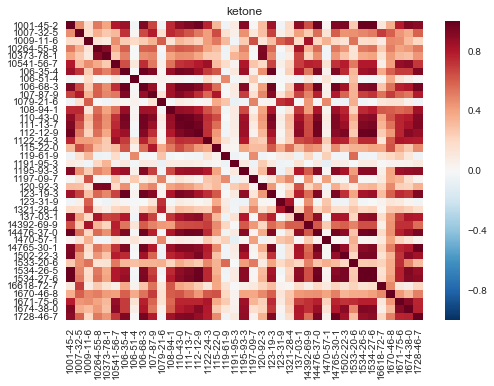

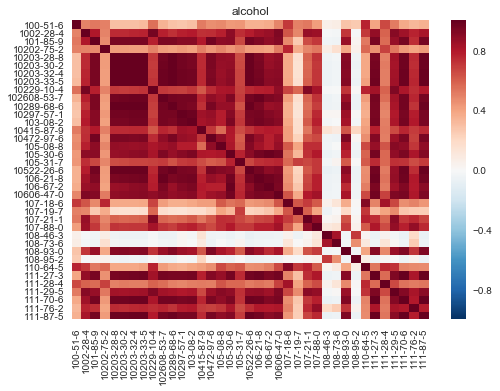

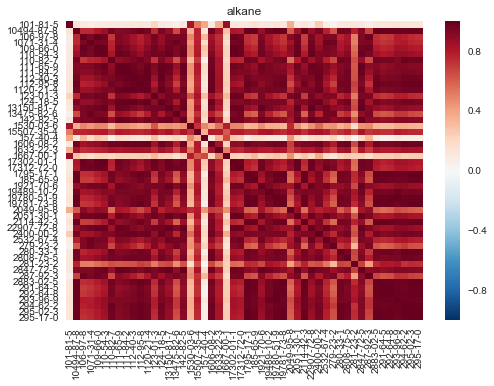

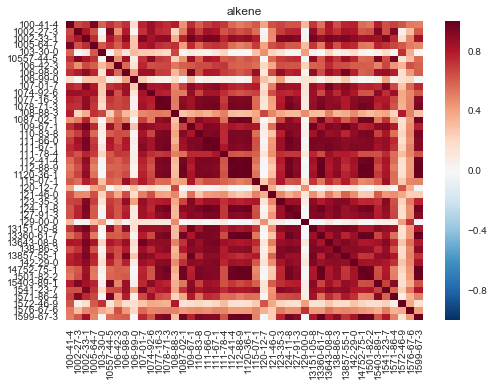

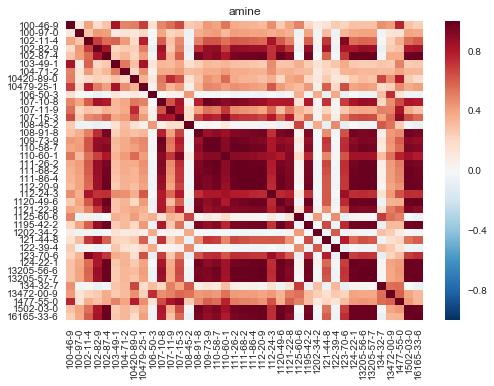

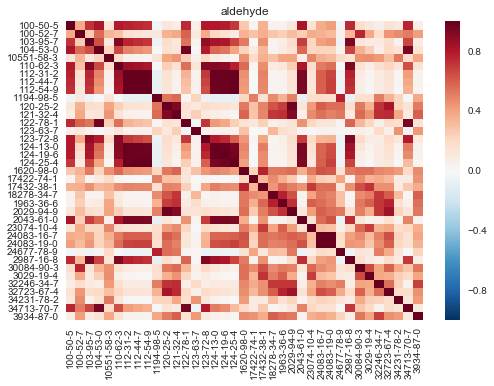

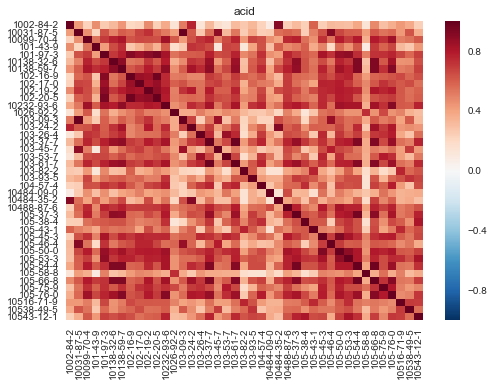

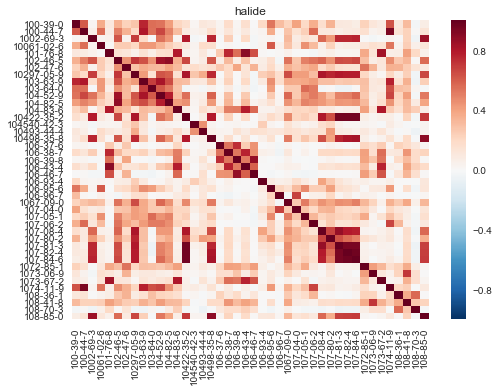

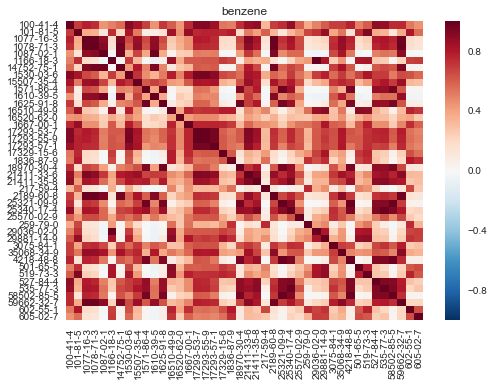

In [63]:
import seaborn as sns
import numpy as np

for each in filtered_funct_group_list:
    #print(dict_df_funct_group[each].shape) #inspect data
    #print(dict_df_funct_group[each].corr())
    
    plt.subplots() #generate a new plot for each group
    sns.heatmap(dict_df_funct_group[each].corr(),vmin=-1, vmax=1) #generate a heatmap
    plt.title(each)
    
plt.show()


- The above heatmaps show that the spectral features of compounds belonging to the same group don't necessarily show a strong correlation between the spectra (i.e., the correlations between spectra are non-linear). 
- In all cases, both red (highly correlated) and white squares (no correlation) occur simultaneously. 
- Nonetheless, it is obvious that alkane shows the highest number of red squares and halide shows the highest number of white squares.   

### (IV) Export final spectra dataset into a csv file

combine all spectra into a single DataFrame

In [64]:
#dict_df_funct_group['ester'].T.head() #Transpose and check

#for each DataFrame in dictionary: transpose, add a label column, and append into a single DataFrame

df_all_data=pd.DataFrame() #create a new DataFrame to store all data

dict_df_funct_group_T={} #create a new dictionary to temporarily store transposed DataFrame and adding afunctional group label 

for each in filtered_funct_group_list: #iterate through dictionary
    #print(dict_df_funct_group[each].shape) #inspect data
    #print(dict_df_funct_group[each].corr())
    
    #transpose and add label
    #df_all_data.append(dict_df_funct_group[each].T, ignore_index=False)
    #df_all_data['label']=each #add label
    dict_df_funct_group_T[each]=dict_df_funct_group[each].T
    dict_df_funct_group_T[each]['label']=each
    
    #combine all DataFrames into a single DataFrame
    df_all_data=df_all_data.append(dict_df_funct_group_T[each], ignore_index=False)
    
    df_all_data.shape #inspect

(b) export DataFrame into a csv file

In [65]:
#export DataFrame to a csv. file
df_all_data.to_csv('data/NIST_selected_organic_spectra.csv')


### V. Conclusions
- The calculated Mws are accurate within 10% with respect to those posted on NIST website.
- The distribution of Mws are generally not normal with the median being in the 100-200 range.
- The shortened NIST chemicals database mostly consist of the following functional groups:'ester', 'ketone', 'alcohol', 'alkane', 'alkene', 'amine', 'aldehyde', 'acid', 'halide', 'thiol', and 'benzene'.  
- IR spectra (in jcamp format) are downloaded to represent each of these group.
- The Pearson correlation coefficient of the representative spectra from each group reveal that the alkane spectra have a high correlation, whereas the halides have a low correlation.
- Generally, there is very little correlation between spectra, even within the same group. For spectra that have a high correlation, the features are expected to be mostly identical. 
- Probably, we cannot rely simply on the overall shape of the spectrum to distinguish functional groups.   
- For the purpose of identifying unknown compounds from its IR spectra, we therefore need to undertake features selection.  
- One specific approach is to correlate each functional group with specific regions in the spectrum.
- There is also a need to utilize more sophisticated algorithms (i.e., machine and deep learning algorithms) to more effectively correlate the chemicals' functional groups to its distinct features.  